In [ ]:
#Absenteism at work

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read data 
# downloaded here https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work
df = pd.read_csv("Absenteeism_at_work.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


I. Will older, heavier or obese people be sicker ?

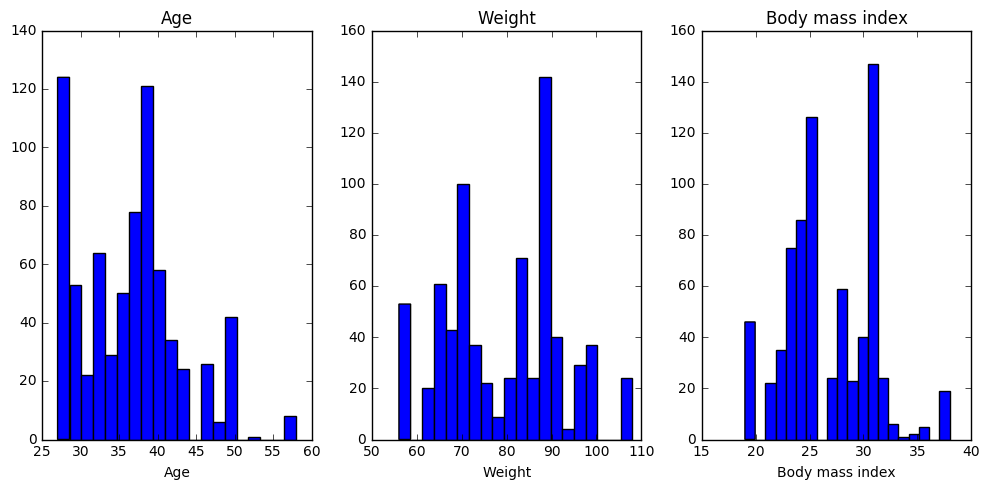

In [4]:
# Will older, heavier or obese people be sicker?
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='blue')
plt.title('Age')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
plt.hist(df['Weight'], bins=20, color='blue')
plt.title('Weight')
plt.xlabel('Weight')


plt.subplot(1, 3, 3)
plt.hist(df['Body mass index'], bins=20, color='blue')
plt.title('Body mass index')
plt.xlabel('Body mass index')


plt.tight_layout()
plt.show()

People with an age of under 27 and around 37 are reported most frequently absent.
The weight does not contribute as a factor of being absent
There is an increased tendency of being absent with a BMI of 20 to 25, after that there is another maximum and BMI of 32


II. Analysis of different factors and their contribution to the duration of absenteeism.
Factors: Education, being a parent, pets, being a social drinker or smoker, the seasons, the month of absence, the day of the week?


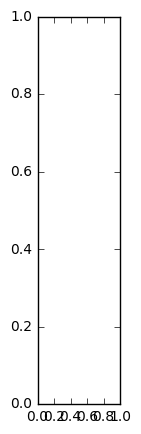

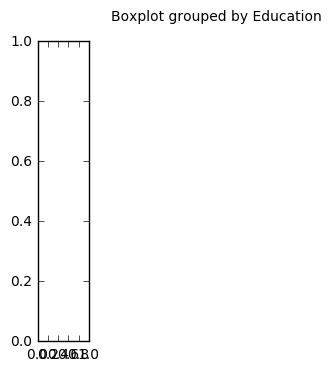

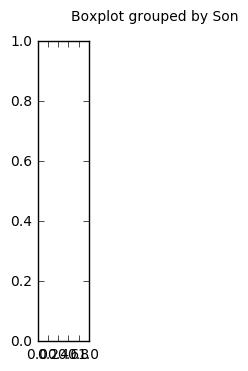

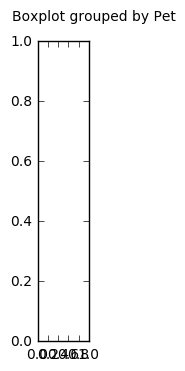

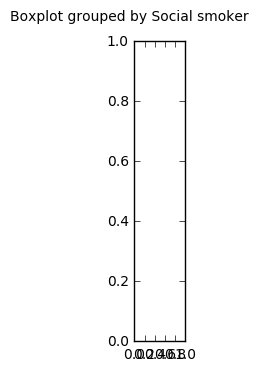

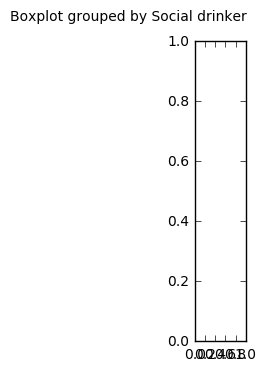

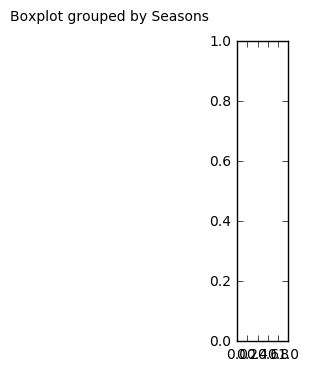

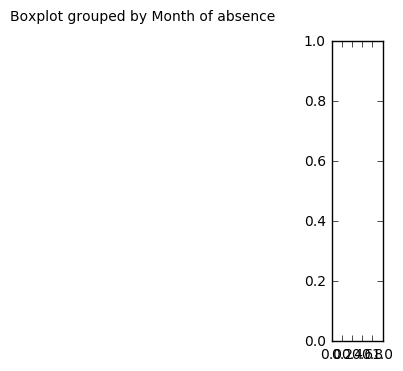

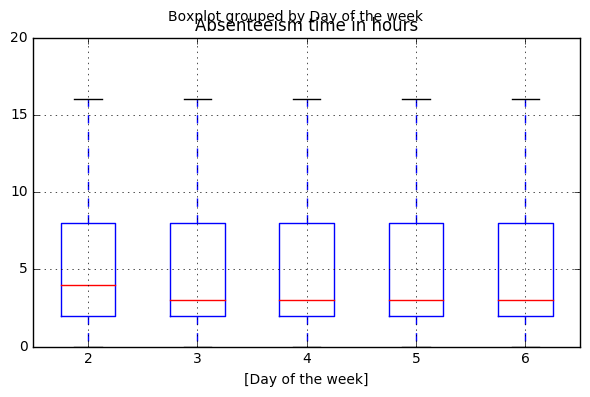

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,8, 1)
df.boxplot(column=['Absenteeism time in hours'] , by=['Education'])
plt.ylim(0, 20)

plt.subplot(1,8, 2)
df.boxplot(column=['Absenteeism time in hours'] , by=['Son'])
plt.ylim(0, 20)

plt.subplot(1,8, 3)
df.boxplot(column=['Absenteeism time in hours'] , by=['Pet'])
plt.ylim(0, 20)

plt.subplot(1, 8, 4)
df.boxplot(column=['Absenteeism time in hours'] , by=['Social smoker'])
plt.ylim(0, 20)

plt.subplot(1, 8, 5)
df.boxplot(column=['Absenteeism time in hours'] , by=['Social drinker'])
plt.ylim(0, 20)

plt.subplot(1, 8, 6)
df.boxplot(column=['Absenteeism time in hours'] , by=['Seasons'])
plt.ylim(0, 20)

plt.subplot(1, 8, 7)
df.boxplot(column=['Absenteeism time in hours'] , by=['Month of absence'])
plt.ylim(0, 20)

plt.subplot(1, 8, 8)
df.boxplot(column=['Absenteeism time in hours'] , by=['Day of the week'])
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

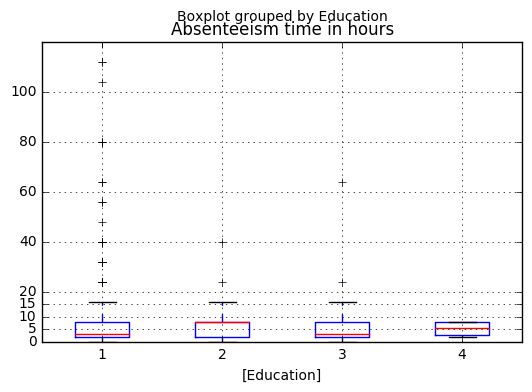

In [5]:
#https://matplotlib.org/examples/pylab_examples/broken_axis.html
df.boxplot(column=['Absenteeism time in hours'] , by=['Education'])
#myTicks = np.append(np.arange(0, 20, step=5), np.arange(20, 120, step=20))
plt.yticks(myTicks, myTicks)

plt.show()

In this popilation, no difference between the different education classes can be identified using a boxplot.
The mean value of education level 2 however is higher, compared to all other groups.

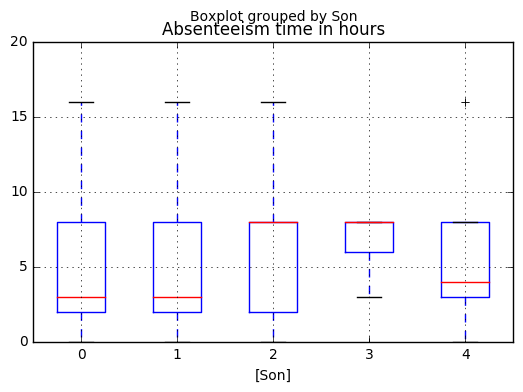

In [14]:

df.boxplot(column=['Absenteeism time in hours'] , by=['Son'])
plt.ylim(0, 20)
plt.show()

People with 0-1 child or 4 children have shorter avarage durations of absenteeism, than people with 2 or 3 kids.


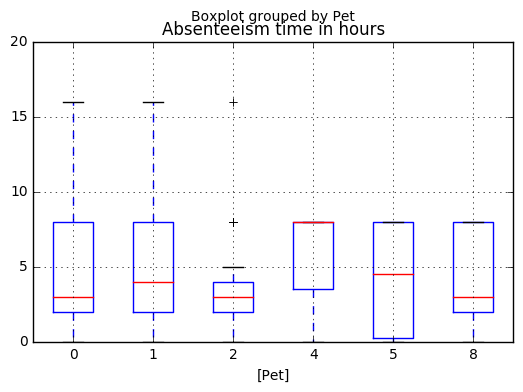

In [15]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Pet'])
plt.ylim(0, 20)
plt.show()

Again focussing on the average duration of absenteeism - people with 4 pets have the durations of absenteeism.

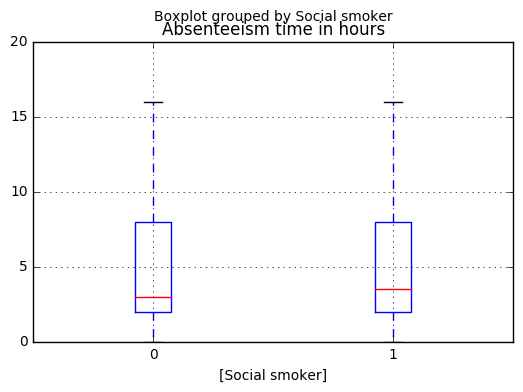

In [16]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Social smoker'])
plt.ylim(0, 20)
plt.show()

No difference in the duration can be observed comparing smokers and non-smokers.

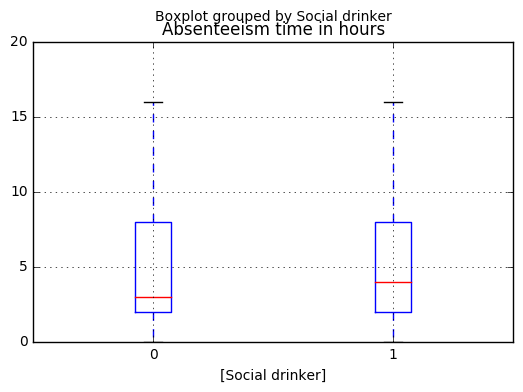

In [17]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Social drinker'])
plt.ylim(0, 20)
plt.show()

In [ ]:
No difference in the duration can be observed comparing smokers and non-smokers.

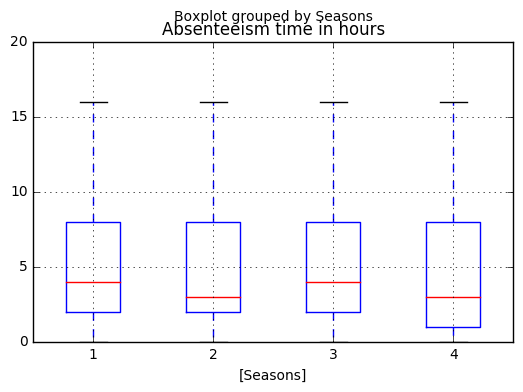

In [18]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Seasons'])
plt.ylim(0, 20)
plt.show()

The season  does not have a measurable effect on the duration of absenteeism

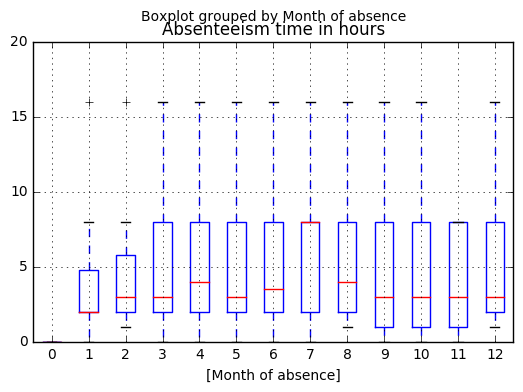

In [19]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Month of absence'])
plt.ylim(0, 20)
plt.show()

in January is duration of absenteeism is the shortes. in July it is the longest.

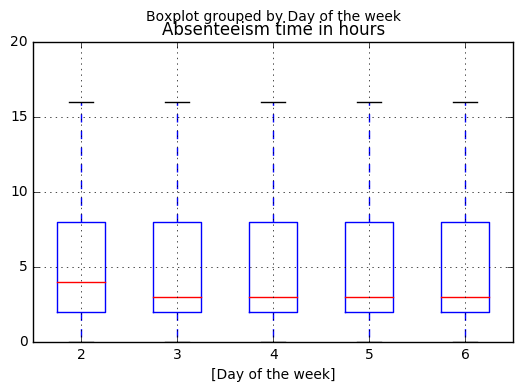

In [20]:
df.boxplot(column=['Absenteeism time in hours'] , by=['Day of the week'])
plt.ylim(0, 20)
plt.show()

There is a slightly longer duration of absenteeism on mondays.

III. What is the most common reason for being absent?

In [9]:
dfnew = df.groupby('Reason for absence').count()
dfnew['freq']= dfnew['ID']
data= dfnew[['freq']]
data['percentage'] = data['freq']/data['freq'].sum(axis=0)
labels= data.index.tolist() # The list of descriptions is too long to plot them

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


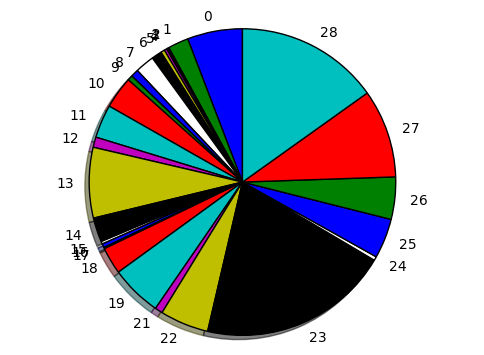

In [10]:
sizes = data['freq'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Most common reasons for absence are 23 (Medical consultation) and 28 (Dental consultation).

IV. Is there a correlation between the numbers of hours someone is missing and the distance between residence to Work?

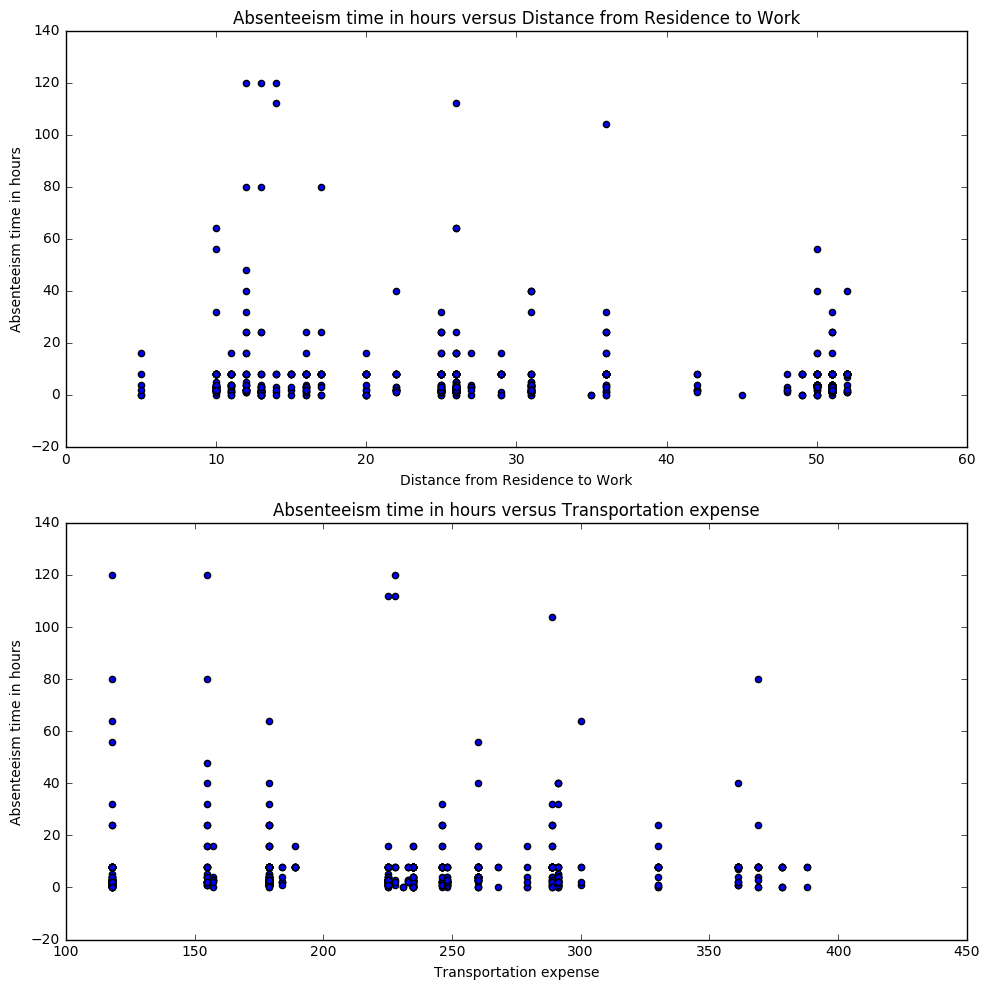

In [27]:
plt.figure(figsize=(10,10))

plt.subplot(2,1, 1)
plt.scatter(x=df['Distance from Residence to Work'], y=df['Absenteeism time in hours'])
plt.title('Absenteeism time in hours versus Distance from Residence to Work')
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Distance from Residence to Work')

plt.subplot(2,1, 2)
plt.scatter(x=df['Transportation expense'], y=df['Absenteeism time in hours'])
plt.title('Absenteeism time in hours versus Transportation expense')
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Transportation expense')

plt.tight_layout()
plt.show()

The duration of absenteeism of people that live far from work and have high travel expenses are lower.